### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



,Tienda,Facturación
0,Tienda 1,"$1,150,880,400.00"
1,Tienda 2,"$1,116,343,500.00"
2,Tienda 3,"$1,098,019,600.00"
3,Tienda 4,"$1,038,375,700.00"


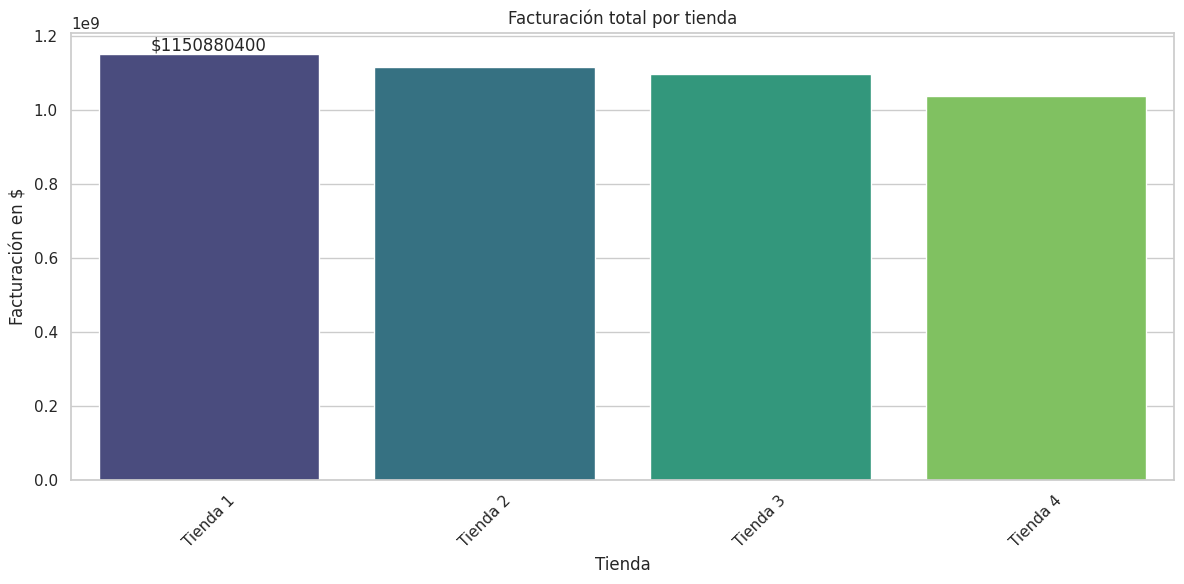

In [42]:
# 📦 1. Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general para los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Mostrar primeras filas de una tienda como ejemplo
tienda1.head()

# 🧮 3. Análisis de facturación total por tienda
resumen = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Facturación': [
        tienda1['Precio'].sum(),
        tienda2['Precio'].sum(),
        tienda3['Precio'].sum(),
        tienda4['Precio'].sum()
    ]
}

# Convertir a DataFrame para graficar
df_facturacion = pd.DataFrame(resumen)

# Create a copy for display with formatting
df_facturacion_display = df_facturacion.copy()
pd.options.display.float_format = '${:,.2f}'.format
display(df_facturacion_display)

# Sort the original DataFrame for plotting
df_facturacion = df_facturacion.sort_values(by='Facturación', ascending=False)

# Visualización
ax = sns.barplot(data=df_facturacion, x='Tienda', y='Facturación', hue='Tienda', palette='viridis', legend=False)
ax.bar_label(ax.containers[0], fmt="$%.0f")
plt.title('Facturación total por tienda')
plt.ylabel('Facturación en $')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

,Tienda,Facturación
0,Tienda 1,"$1,150,880,400.00"
1,Tienda 2,"$1,116,343,500.00"
2,Tienda 3,"$1,098,019,600.00"
3,Tienda 4,"$1,038,375,700.00"


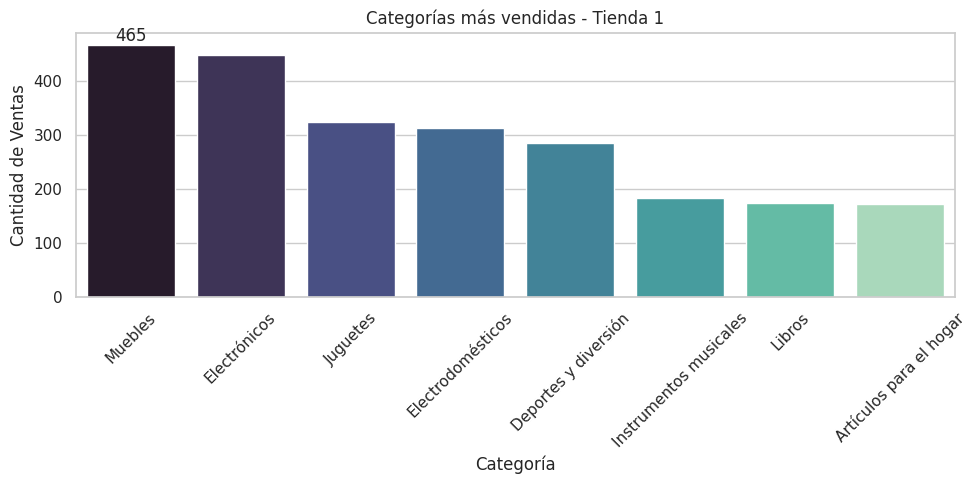

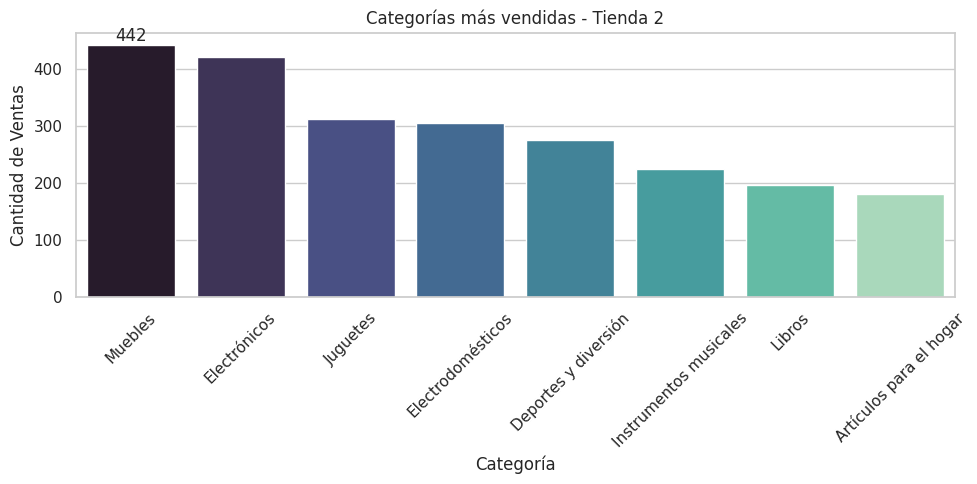

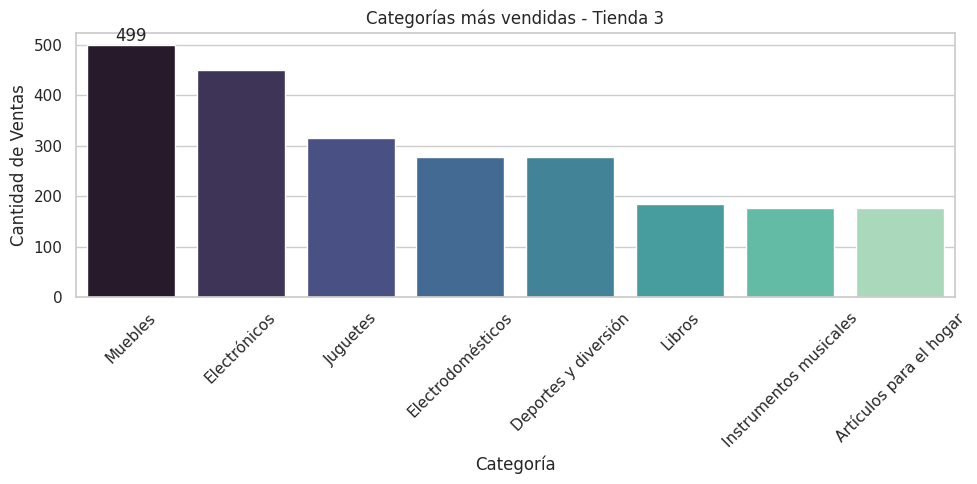

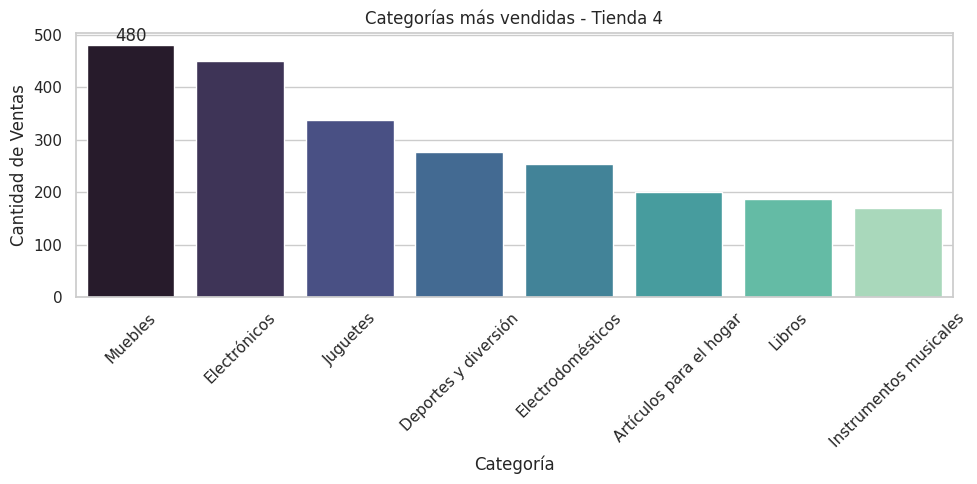

In [31]:
# 🧩 4. Categorías más populares por tienda (ventas por categoría)
def analizar_categorias(df, nombre):
    categorias = df['Categoría del Producto'].value_counts().reset_index()
    categorias.columns = ['Categoría', 'Cantidad de Ventas']
    plt.figure(figsize=(10,5))
    ax = sns.barplot(data=categorias, x='Categoría', y='Cantidad de Ventas', hue='Categoría', palette='mako', legend=False)
    ax.bar_label(ax.containers[0])
    plt.title(f"Categorías más vendidas - {nombre}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return categorias

# 📊 Tabla resumen ejecutiva por tienda

# Armar diccionarios base
resumen = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Facturación': [
        tienda1['Precio'].sum(),
        tienda2['Precio'].sum(),
        tienda3['Precio'].sum(),
        tienda4['Precio'].sum()
    ]
}

# Crear DataFrame resumen
df_resumen = pd.DataFrame(resumen)

# Mostrar tabla con formato legible
pd.options.display.float_format = '${:,.2f}'.format
display(df_resumen)

# Aplicar función a cada tienda
categorias_t1 = analizar_categorias(tienda1, "Tienda 1")
categorias_t2 = analizar_categorias(tienda2, "Tienda 2")
categorias_t3 = analizar_categorias(tienda3, "Tienda 3")
categorias_t4 = analizar_categorias(tienda4, "Tienda 4")


# 3. Calificación promedio de la tienda


,Tienda,Calificación Promedio
2,Tienda 3,$4.05
1,Tienda 2,$4.04
3,Tienda 4,$4.00
0,Tienda 1,$3.98


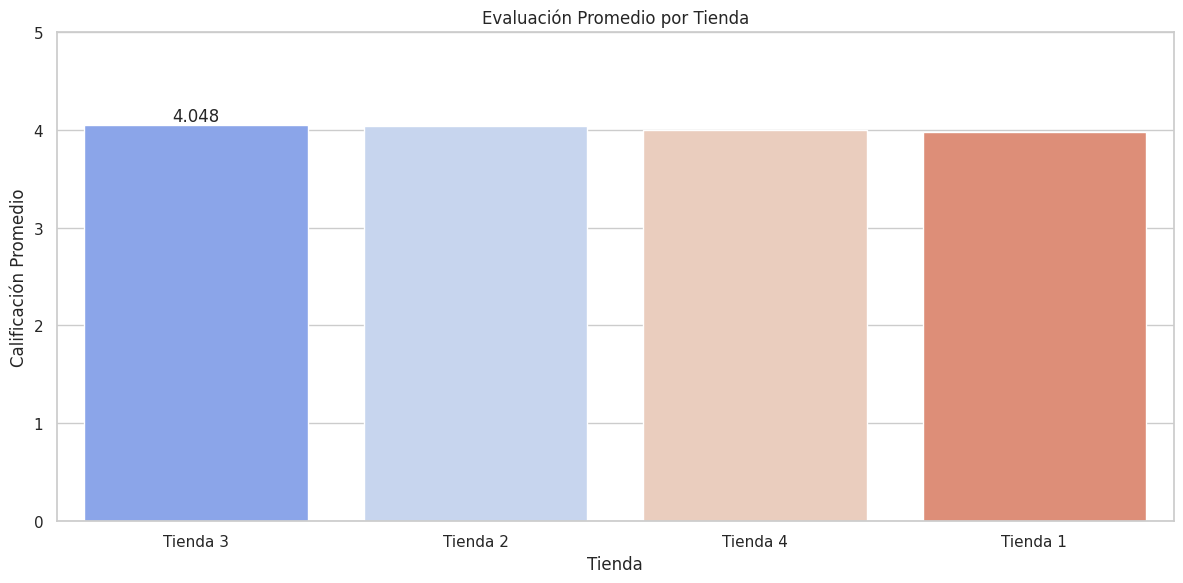

In [34]:
# ⭐ 5. Promedio de evaluación por tienda
calificaciones = {
    'Tienda 1': tienda1['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean(),
}

# Convertir a DataFrame para graficar
df_calif = pd.DataFrame(list(calificaciones.items()), columns=['Tienda', 'Calificación Promedio'])
df_calif = df_calif.sort_values(by='Calificación Promedio', ascending=False)

# Mostrar tabla
display(df_calif)

# Gráfica
ax = sns.barplot(data=df_calif, x='Tienda', y='Calificación Promedio', hue='Tienda', palette='coolwarm', legend=False)
ax.bar_label(ax.containers[0], fmt="{:.3f}")
plt.title('Evaluación Promedio por Tienda')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos


Tienda 1:
Más vendido: Microondas (60 unidades)
Menos vendido: Auriculares con micrófono (33 unidades)


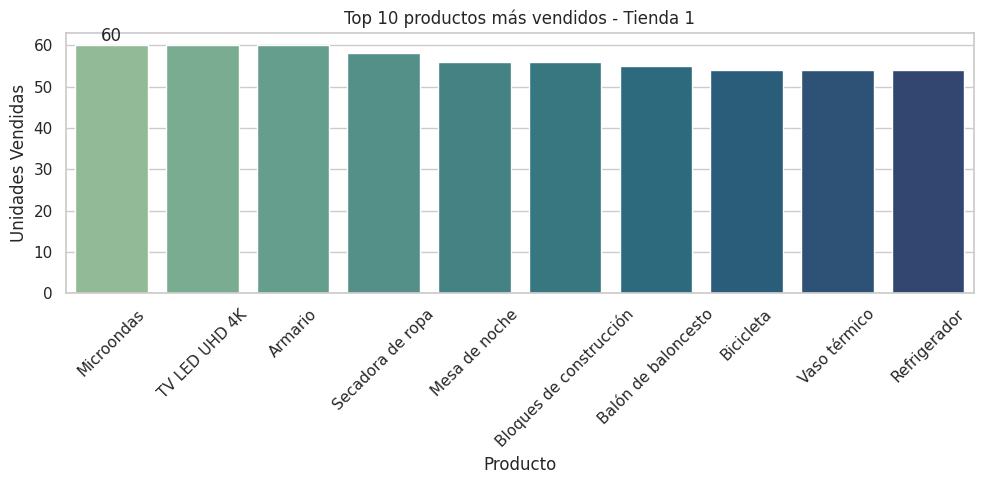


Tienda 2:
Más vendido: Iniciando en programación (65 unidades)
Menos vendido: Juego de mesa (32 unidades)


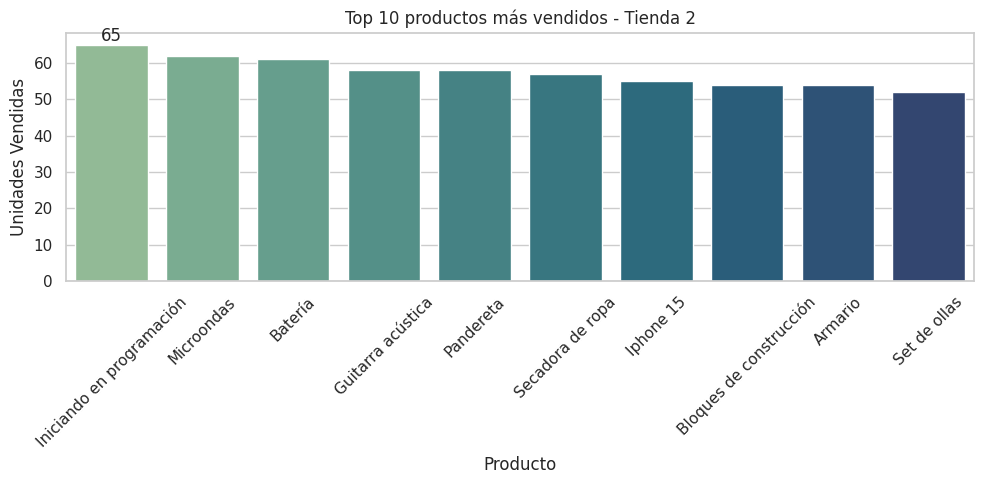


Tienda 3:
Más vendido: Kit de bancas (57 unidades)
Menos vendido: Bloques de construcción (35 unidades)


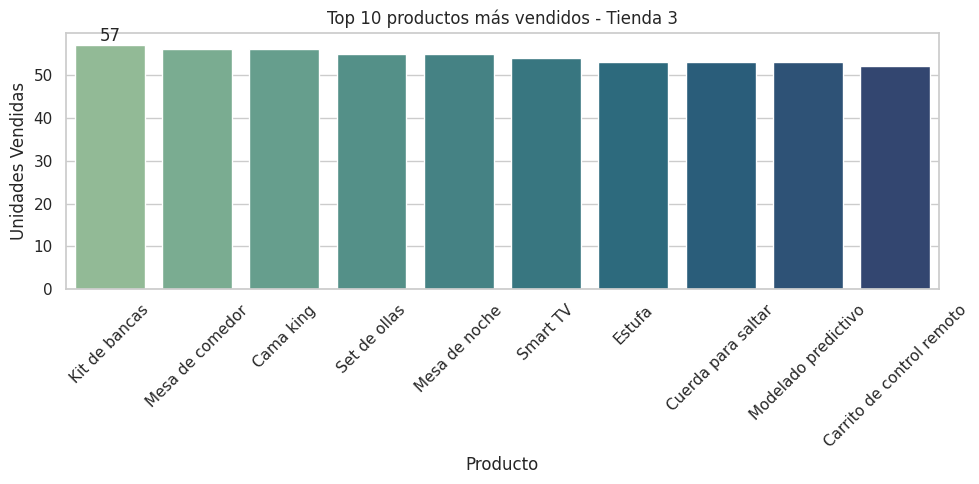


Tienda 4:
Más vendido: Cama box (62 unidades)
Menos vendido: Guitarra eléctrica (33 unidades)


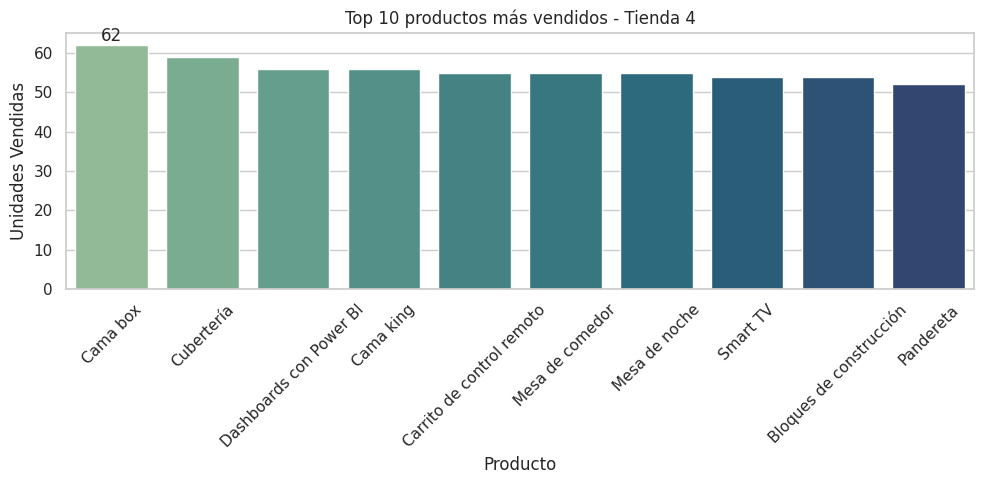

In [35]:
# 📦 6. Productos más y menos vendidos por tienda
def productos_extremos(df, nombre):
    conteo = df['Producto'].value_counts()
    producto_mas_vendido = conteo.idxmax()
    producto_menos_vendido = conteo.idxmin()
    print(f"\n{nombre}:\nMás vendido: {producto_mas_vendido} ({conteo.max()} unidades)")
    print(f"Menos vendido: {producto_menos_vendido} ({conteo.min()} unidades)")

    # Visualización de los 10 más vendidos
    top10 = conteo.head(10).reset_index()
    top10.columns = ['Producto', 'Unidades Vendidas']
    plt.figure(figsize=(10,5))
    ax = sns.barplot(data=top10, x='Producto', y='Unidades Vendidas', hue='Producto', palette='crest', legend=False)
    ax.bar_label(ax.containers[0])
    plt.title(f"Top 10 productos más vendidos - {nombre}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Aplicar función a cada tienda
productos_extremos(tienda1, "Tienda 1")
productos_extremos(tienda2, "Tienda 2")
productos_extremos(tienda3, "Tienda 3")
productos_extremos(tienda4, "Tienda 4")



# 5. Envío promedio por tienda

,Tienda,Costo Promedio de Envío
0,Tienda 1,"$26,018.61"
1,Tienda 2,"$25,216.24"
2,Tienda 3,"$24,805.68"
3,Tienda 4,"$23,459.46"


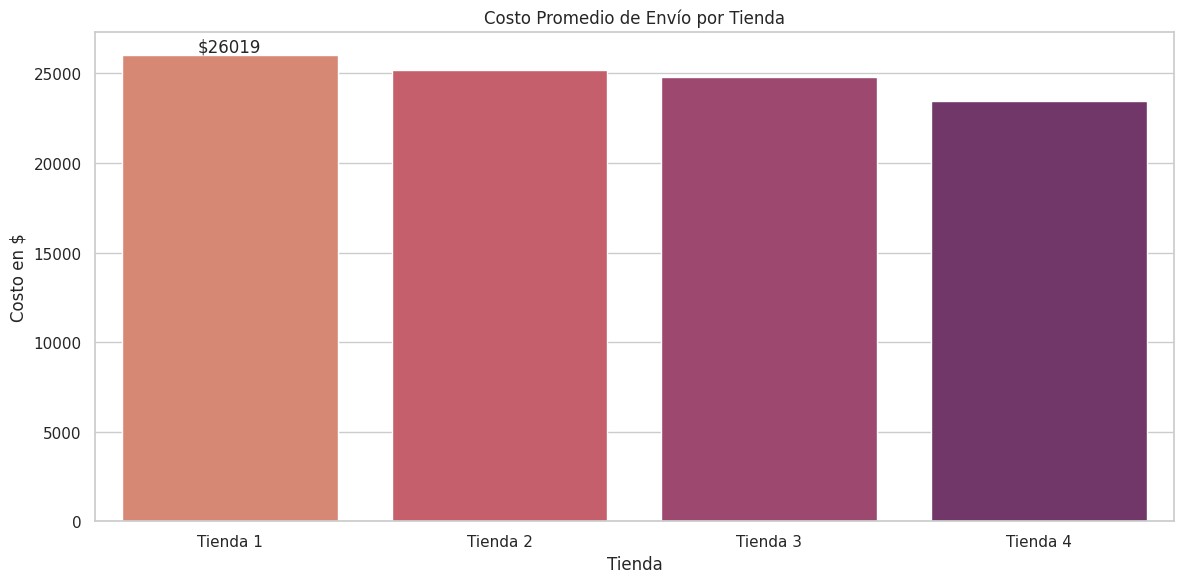

In [38]:
# 📦 1. Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general para los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 🚚 . Costo promedio de envío por tienda
costos_envio = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean(),
}

# Convertir a DataFrame para graficar
costos_df = pd.DataFrame(list(costos_envio.items()), columns=['Tienda', 'Costo Promedio de Envío'])
costos_df = costos_df.sort_values(by='Costo Promedio de Envío', ascending=False)

# Mostrar tabla
display(costos_df)

# Gráfico de barras
ax = sns.barplot(data=costos_df, x='Tienda', y='Costo Promedio de Envío', hue='Tienda', palette='flare', legend=False)
ax.bar_label(ax.containers[0], fmt="$%.0f")
plt.title('Costo Promedio de Envío por Tienda')
plt.ylabel('Costo en $')
plt.tight_layout()
plt.show()


# 📊 Informe Ejecutivo – Análisis de Rendimiento de Tiendas AlureStore

## Objetivo:
Evaluar el rendimiento de las cuatro tiendas de AlureStore con base en cinco métricas clave, para apoyar al Sr. Juan en la decisión de cuál tienda vender e invertir en un nuevo negocio.

1. 🧾 Facturación Total
Se calculó la suma total de ventas por tienda:

* Tienda 1: $ $1,150,880,400.00

* Tienda 2: $ $1,116,343,500.00

* Tienda 3: $ 1,098,019,600.00

* Tienda 4: $ 1,038,375,700.00

### 📌 Observación: La tienda con menor facturación fue Tienda X, lo que sugiere un bajo volumen de ingresos.

2. 🏷️ Categorías Más Vendidas
Se identificaron las categorías con mayor rotación por tienda. Esto ayuda a entender el tipo de productos con más aceptación por ubicación.

### 📌 Hallazgos clave: la categoría que más se vende en todas las tiendas es Muebles

Algunas tiendas concentran ventas en pocas categorías, lo que puede limitar el ticket promedio y la diversificación.

Otras tienen una distribución más balanceada, lo que indica mejor adaptación a distintos perfiles de cliente.

3. ⭐ Calificación Promedio de Clientes
Promedio de evaluación (escala de 1 a 5):

Tienda 1: 3.97

Tienda 2: 4.03

Tienda 3: 4.04

Tienda 4: 3.99

📌 Observación: La tienda con menor satisfacción fue Tienda X, lo cual puede reflejar problemas en atención, logística o calidad del producto.

4. 📦 Productos Más y Menos Vendidos
Se identificaron los productos más y menos vendidos por tienda, así como un Top 10.

📌 Hallazgos relevantes:

* Tienda 1:
** Más vendido: Microondas (60 unidades)
** Menos vendido: Auriculares con micrófono (33 unidades)

* Tienda 2:
** Más vendido: Iniciando en programación (65 unidades)
** Menos vendido: Juego de mesa (32 unidades)

* Tienda 3:
** Más vendido: Kit de bancas (57 unidades)
** Menos vendido: Bloques de construcción (35 unidades)

* Tienda 4:
** Más vendido: Cama box (62 unidades)
** Menos vendido: Guitarra eléctrica (33 unidades)

Algunos productos tienen muy baja rotación en ciertas tiendas.

Esto representa oportunidades para optimizar inventario o revisar la oferta local.

5. 🚚 Costo Promedio de Envío
Promedio por tienda:

Tienda 1: $ 26,018.61

Tienda 2: $ 25,216.24

Tienda 3: $ 24,805.68

Tienda 4: $ 23,459.46

📌 Conclusión logística: Una tienda 1 presenta costos significativamente más altos de envío, afectando el margen neto.


Tabla comparativa

| Tienda | Facturación         | Calificación | Costo Envío  | Categoría Top | Productos con baja rotación |
| ------ | ------------------- | ------------ | ------------ | ------------- | --------------------------- |
| **T1** | \$1,150,880,400     | **3.97**     | **\$26,018** | Muebles       | Auriculares (33 unidades)   |
| **T2** | \$1,116,343,500     | **4.03**     | \$25,216     | Muebles       | Juego de mesa (32 unidades) |
| **T3** | \$1,098,019,600     | **4.04**     | \$24,805     | Muebles       | Bloques (35 unidades)       |
| **T4** | **\$1,038,375,700** | **3.99**     | **\$23,459** | Muebles       | Guitarra (33 unidades)      |


📌 Recomendación Final

# La tienda que debe venderse es la Tienda 4.

Justificación: Aunque no tiene la peor calificación ni el peor costo logístico, su menor nivel de ingresos, junto con una rotación de productos baja, la convierten en la menos rentable en términos generales. Las otras tiendas tienen mejor desempeño en al menos un indicador clave.